# Exploratory Data Analysis (EDA)
## Fake Job Posting Detection Dataset

This notebook explores the Kaggle "Fake Job Posting Prediction" dataset.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Load the Dataset


In [2]:
# Load the dataset
import os

dataset_path = '../data/raw/fake_job_postings.csv'

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")

df = pd.read_csv(dataset_path)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset shape: (17880, 18)
Columns: ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']


## 2. Basic Data Information


In [3]:
# Display first few rows
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Data types and basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## 3. Check for Missing Values


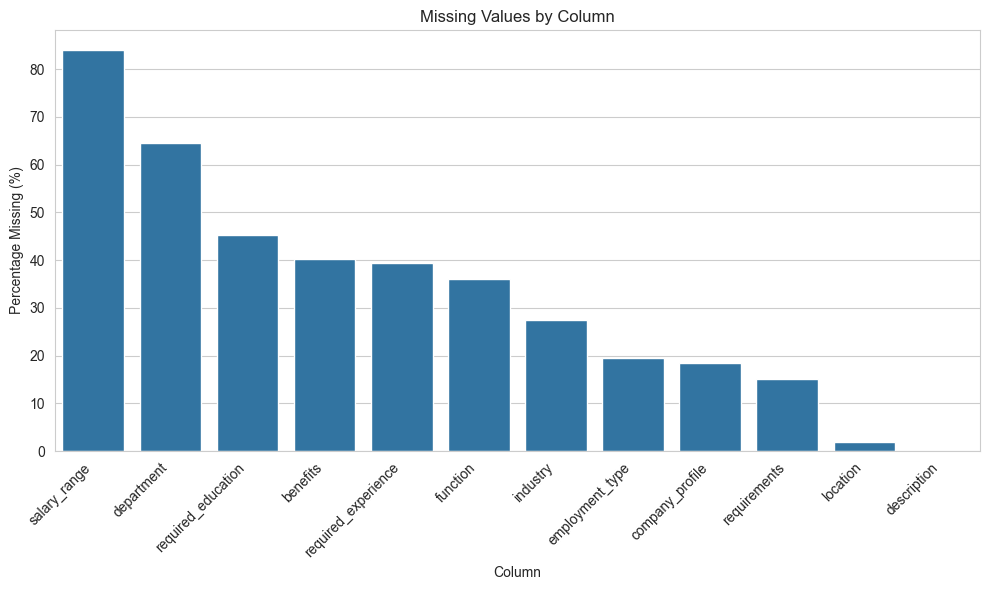

In [5]:
# Missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

missing_df

# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df.reset_index(), x='index', y='Percentage')
    plt.title('Missing Values by Column')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## 4. Target Variable Analysis


Class Distribution:
fraudulent
0    17014
1      866
Name: count, dtype: int64

Class Percentages:
fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64


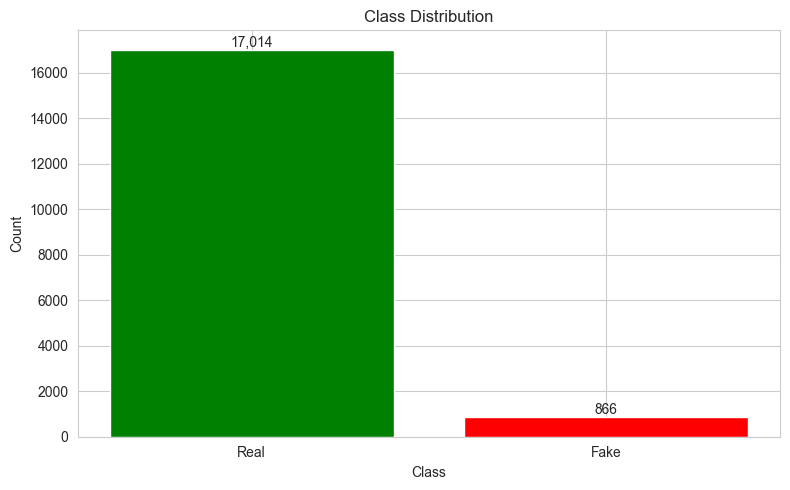

In [13]:
# Check target variable (fraudulent column)
if 'fraudulent' in df.columns:
    class_counts = df['fraudulent'].value_counts().sort_index()
    print("Class Distribution:")
    print(class_counts)
    print("\nClass Percentages:")
    print(df['fraudulent'].value_counts(normalize=True).sort_index() * 100)
    
    # Visualize class distribution
    plt.figure(figsize=(8, 5))
    labels = ['Real', 'Fake']
    colors = ['green', 'red']
    bars = plt.bar(labels, class_counts.values, color=colors)
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


## 5. Sample Real vs Fake Job Postings


In [7]:
# Sample job postings
if 'fraudulent' in df.columns:
    real_sample = df[df['fraudulent'] == 0].iloc[0]
    fake_sample = df[df['fraudulent'] == 1].iloc[0]
    
    print("Sample Real Job Posting:")
    print(f"Title: {real_sample.get('title', 'N/A')}")
    print(f"Description (first 500 chars):\n{str(real_sample.get('description', ''))[:500]}...")
    
    print("\nSample Fake Job Posting:")
    print(f"Title: {fake_sample.get('title', 'N/A')}")
    print(f"Description (first 500 chars):\n{str(fake_sample.get('description', ''))[:500]}...")


Sample Real Job Posting:
Title: Marketing Intern
Description (first 500 chars):
Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provision...

Sample Fake Job Posting:
Title: IC&E Technician
Description (first 500 chars):
IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities: Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Perfo

## 6. Text Length Analysis


Text Length Statistics:
Real - Mean length: 1221 chars, Mean words: 171
Fake - Mean length: 1155 chars, Mean words: 159


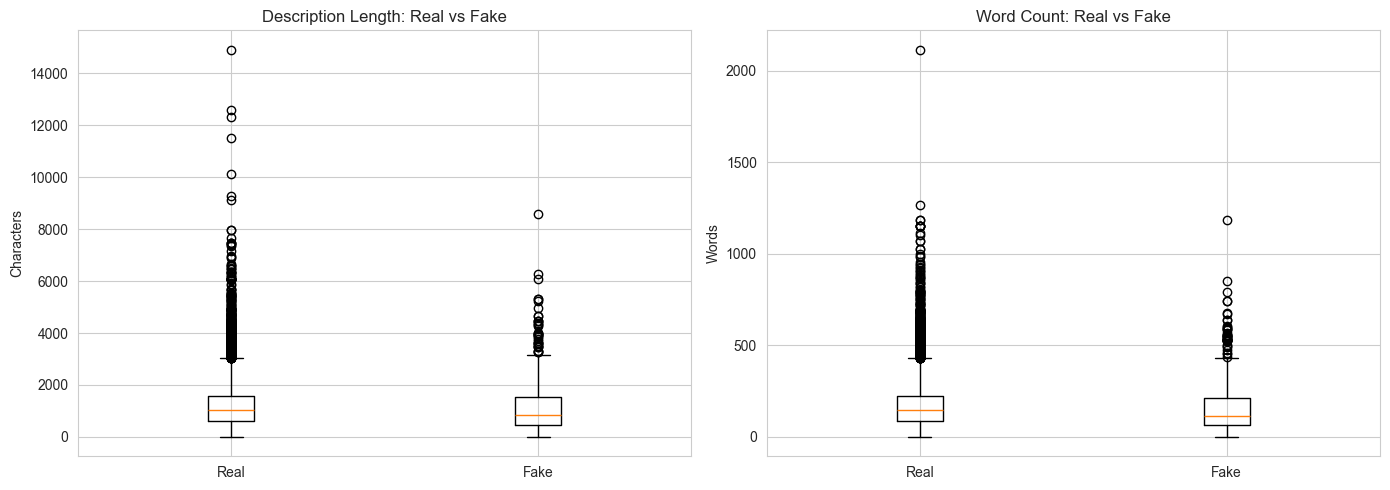

In [8]:
# Analyze text length differences between real and fake postings
if 'fraudulent' in df.columns and 'description' in df.columns:
    df['description_length'] = df['description'].fillna('').astype(str).str.len()
    df['description_word_count'] = df['description'].fillna('').astype(str).str.split().str.len()
    
    real_stats = df[df['fraudulent'] == 0]
    fake_stats = df[df['fraudulent'] == 1]
    
    print("Text Length Statistics:")
    print(f"Real - Mean length: {real_stats['description_length'].mean():.0f} chars, Mean words: {real_stats['description_word_count'].mean():.0f}")
    print(f"Fake - Mean length: {fake_stats['description_length'].mean():.0f} chars, Mean words: {fake_stats['description_word_count'].mean():.0f}")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].boxplot([real_stats['description_length'], fake_stats['description_length']], 
                    labels=['Real', 'Fake'])
    axes[0].set_title('Description Length: Real vs Fake')
    axes[0].set_ylabel('Characters')
    
    axes[1].boxplot([real_stats['description_word_count'], fake_stats['description_word_count']], 
                    labels=['Real', 'Fake'])
    axes[1].set_title('Word Count: Real vs Fake')
    axes[1].set_ylabel('Words')
    
    plt.tight_layout()
    plt.show()


## 7. Column Analysis


In [9]:
# Analyze key columns
if 'location' in df.columns:
    print(f"Unique locations: {df['location'].nunique()}")
    print("Top 10 locations:")
    print(df['location'].value_counts().head(10))

if 'employment_type' in df.columns:
    print("\nEmployment Type Distribution:")
    print(df['employment_type'].value_counts())

if 'required_experience' in df.columns:
    print("\nRequired Experience Distribution:")
    print(df['required_experience'].value_counts())

print(f"\nData Quality:")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Total missing values: {df.isnull().sum().sum()}")


Unique locations: 3105
Top 10 locations:
location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
US, TX, Houston          269
US, IL, Chicago          255
US, DC, Washington       251
DE, BE, Berlin           221
NZ, N, Auckland          218
Name: count, dtype: int64

Employment Type Distribution:
employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

Required Experience Distribution:
required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

Data Quality:
Duplicate rows: 0
Total missing values: 70106


## 8. Summary and Next Steps


In [10]:
# EDA Summary
print(f"Total samples: {len(df):,}")
print(f"Total features: {len(df.columns)}")

if 'fraudulent' in df.columns:
    dist = df['fraudulent'].value_counts()
    print(f"\nClass distribution:")
    print(f"  Real (0): {dist[0]:,} ({dist[0]/len(df)*100:.2f}%)")
    print(f"  Fake (1): {dist[1]:,} ({dist[1]/len(df)*100:.2f}%)")
    print(f"  Imbalance ratio: {dist[0]/dist[1]:.2f}:1")

print(f"\nMissing values: {df.isnull().sum().sum():,}")
print(f"Duplicate rows: {df.duplicated().sum()}")

if 'fraudulent' in df.columns:
    print("\nKey Finding: Severe class imbalance - need to handle this in modeling")


Total samples: 17,880
Total features: 20

Class distribution:
  Real (0): 17,014 (95.16%)
  Fake (1): 866 (4.84%)
  Imbalance ratio: 19.65:1

Missing values: 70,106
Duplicate rows: 0

Key Finding: Severe class imbalance - need to handle this in modeling
